## Google search Analysis Using Python

### Installation of Pytrends

In [1]:
!pip install pytrends

  Obtaining dependency information for pytrends from https://files.pythonhosted.org/packages/68/ba/7a24a3723c790000faf880505ff1cc46f4d29f46dd353037938a070c4d23/pytrends-4.9.2-py3-none-any.whl.metadata


### Connecting to Google
#### Google search trends by importing the required python libraries
#### Importing methods TrendReq and pytrends.req for requesting the google trending topics

In [17]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time

Trending_topics=TrendReq(hl='en-US',tz=350)

Creating the Dataframe of the top countires and searching the term COULD COMPUTING, we are using the method build_payload

In [18]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0,timeframe='today 12-m')
time.sleep(10)

In [26]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time

Trending_topics = TrendReq(hl='en-US', tz=360)

kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')
time.sleep(10)  

data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2023-12-10              100      False
2024-01-28               84      False
2023-12-17               82      False
2024-11-17               81      False
2024-02-11               80      False
2024-03-17               79      False
2024-01-21               79      False
2024-01-07               78      False
2024-05-05               78      False
2024-04-28               78      False


In [27]:
kw_list = ["Cloud Computing"]
Trending_topics.build_payload(kw_list, cat=0, timeframe='2018-01-01 2018-02-01', geo='', gprop='')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2018-01-30              100      False
2018-01-18               97      False
2018-02-01               95      False
2018-01-08               92      False
2018-01-24               91      False
2018-01-04               90      False
2018-01-11               90      False
2018-01-10               89      False
2018-01-22               89      False
2018-01-09               88      False


In [28]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing", 
                        ascending = False)
data = data.head(10)
print(data)

TooManyRequestsError: The request failed: Google returned a response with code 429

In [29]:
!pip install backoff

  Obtaining dependency information for backoff from https://files.pythonhosted.org/packages/df/73/b6e24bd22e6720ca8ee9a85a0c4a2971af8497d8f3193fa05390cbd46e09/backoff-2.2.1-py3-none-any.whl.metadata


In [31]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time
import backoff

@backoff.on_exception(backoff.expo, pytrends.exceptions.TooManyRequestsError, max_tries=3)  # Decorator to handle TooManyRequestsError
def get_trends_data(trending_topics, kw_list):
        trending_topics.build_payload(kw_list, cat=0, timeframe='today 12-m')
        interest_over_time_data = trending_topics.interest_over_time()
        interest_by_region_data = trending_topics.interest_by_region()
        return interest_over_time_data, interest_by_region_data

Trending_topics = TrendReq(hl='en-US', tz=360)
kw_list = ["Cloud Computing"]


interest_over_time_data, interest_by_region_data = get_trends_data(Trending_topics, kw_list)


data = interest_over_time_data.sort_values(by="Cloud Computing", ascending=False)
data = data.head(10)
print("Interest Over Time:")
print(data)


data = interest_by_region_data.sort_values(by="Cloud Computing", ascending=False)
data = data.head(10)
print("\nInterest By Region:")
print(data)

AttributeError: 'TrendReq' object has no attribute 'exceptions'

In [32]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time
import backoff 
import pytrends 

@backoff.on_exception(backoff.expo, pytrends.exceptions.TooManyRequestsError, max_tries=3)  # Decorator to handle TooManyRequestsError
def get_trends_data(trending_topics, kw_list):
    
    trending_topics.build_payload(kw_list, cat=0, timeframe='today 12-m')
    interest_over_time_data = trending_topics.interest_over_time()

    time.sleep(5)  
    interest_by_region_data = trending_topics.interest_by_region()
    return interest_over_time_data, interest_by_region_data

Trending_topics = TrendReq(hl='en-US', tz=360)
kw_list = ["Cloud Computing"]


interest_over_time_data, interest_by_region_data = get_trends_data(Trending_topics, kw_list)


data = interest_over_time_data.sort_values(by="Cloud Computing", ascending=False)
data = data.head(10)
print("Interest Over Time:")
print(data)


data = interest_by_region_data.sort_values(by="Cloud Computing", ascending=False)
data = data.head(10)
print("\nInterest By Region:")
print(data)

Interest Over Time:
            Cloud Computing  isPartial
date                                  
2023-12-10              100      False
2024-01-28               93      False
2024-02-25               91      False
2024-01-21               89      False
2023-12-17               88      False
2024-11-17               87      False
2024-02-11               87      False
2024-03-17               86      False
2024-05-19               86      False
2024-02-04               86      False

Interest By Region:
             Cloud Computing
geoName                     
Nepal                    100
Ethiopia                  90
India                     88
Zimbabwe                  79
Cameroon                  67
Ghana                     59
Sri Lanka                 59
Kenya                     51
Nigeria                   47
South Korea               46


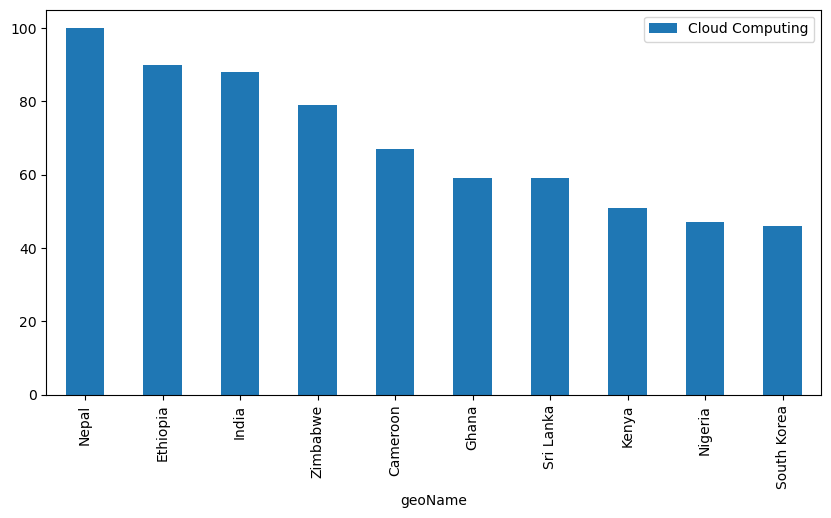

In [33]:
data.reset_index().plot(x='geoName', y='Cloud Computing',
                        figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

In [38]:
df = Trending_topics.top_charts(2023, hl='en-US', tz=300, geo='GLOBAL')  
if df is not None:  
    print(df.head(10))  
else:  
    print("No data available for the specified parameters.")

                    title   exploreQuery
0  War in Israel and Gaza    Israel Gaza
1       Titanic submarine               
2       Turkey earthquake               
3        Hurricane Hilary               
4        Hurricane Idalia               
5           Hurricane Lee               
6          Maine shooting               
7      Nashville shooting               
8           Chandrayaan-3  Chandrayaan 3
9            War in Sudan          Sudan


### For Related Queries

In [39]:
try:
    Trending_topics.build_payload(kw_list=['Cloud Computing'])
    related_queries = Trending_topics.related_queries()
    related_queries.values()
except (KeyError, IndexError):
    print("No related queries found for 'Cloud Computing'")

No related queries found for 'Cloud Computing'
